<a href="https://colab.research.google.com/github/Jett987/Machine_Learning/blob/main/Loan_Approval_Classification_Preprocessed_FinalProject_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project CMPSC-4983-01 Dr. Reddy's Machine Learning
(all coding was referenced from Dr. Reddy's Data Preprocessing lecture video, Data Exploration, Classification Video and examples, my machine learning repository as well as recommended outside sources. See references at the bottom for specific links.)

# Final Project: Machine Learning (CMPSC-4983-01)  

### Jett McDowell

#Data Preprocessing

#Removing Missing Values:

The dataset I will be using is Loan Approval Dataset. I chose this dataset because it contains boolean values that are necessary for $classification$. I will use the following lines of code to import the dataset and begin cleaning the dataset of any unnecessary values.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Jett987/Machine_Learning/main/loan_approval_dataset_mod.csv', header=None)
data.columns = ['loan_id', 'no_of_dependents', 'education', 'self_employed','income_annum', 'loan_amount', 'loan_term', 'cibil_score','residential_assets_value', 'commercial_assets_value','luxury_assets_value','bank_asset_value','loan_status']

print('Total Number of Records:  %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
data.head()

Total Number of Records:  4269
Total Number of Features: 13


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Next, I will check for missing values.

In [2]:
import numpy as np

data = data.replace('?',np.NaN)

print('Total Number of Records: %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
print('Total Number of missing values:')
for col in data.columns:
    print('\n%s: %d' % (col,data[col].isna().sum()))

Total Number of Records: 4269
Total Number of Features: 13
Total Number of missing values:

loan_id: 0

no_of_dependents: 0

education: 0

self_employed: 0

income_annum: 0

loan_amount: 0

loan_term: 0

cibil_score: 0

residential_assets_value: 0

commercial_assets_value: 0

luxury_assets_value: 0

bank_asset_value: 0

loan_status: 0


Next, I will check for missing values utilizing a different method.

In [3]:
print('Total number of rows before removing missing values: %d' % (data.shape[0]))
data2 = data.dropna()
print('Total number of rows after dropping missing values: %d' % (data2.shape[0]))

Total number of rows before removing missing values: 4269
Total number of rows after dropping missing values: 4269


#Checking for Outliers:

Next, I will display the first five rows of the data I am checking.

In [4]:
data2.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Next, I will check for outliers using box plots.

In [6]:
%matplotlib inline

data2 = data.drop(['education','self_employed','loan_status'],axis=1)
data2.dtypes


loan_id                     int64
no_of_dependents            int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
dtype: object

<Axes: >

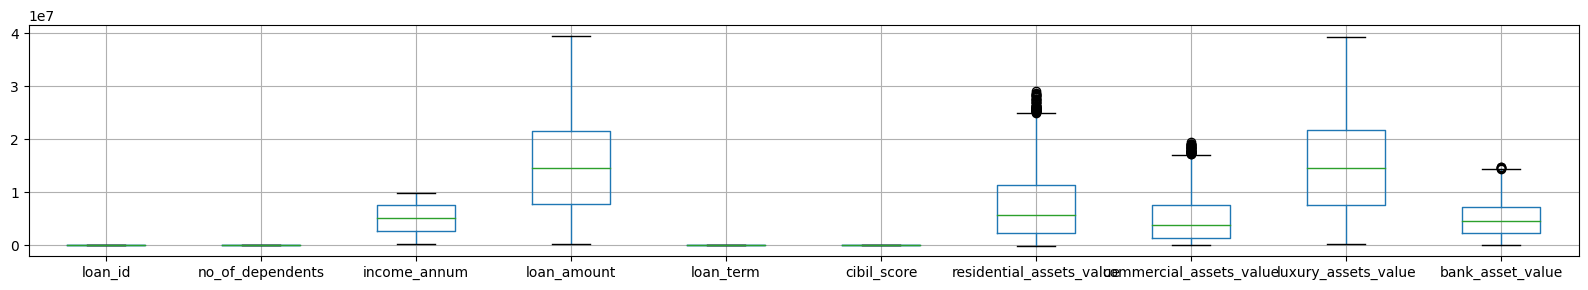

In [7]:
data2.boxplot(figsize=(20,3))

As you can see, it appears as though there are a significant number of outliers. Next, I will try to resolve them.

In [8]:
Z = (data2-data2.mean())/data2.std()
Z[1:4269]

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1,-1.730631,-1.473375,-0.341710,-0.324376,-0.508031,-1.060927,-0.733838,-0.631847,-0.694912,-0.515876
2,-1.729820,0.295587,1.439653,1.610745,1.593844,-0.544777,-0.057294,-0.107806,1.996286,2.407034
3,-1.729008,0.295587,1.119008,1.721323,-0.508031,-0.770955,1.649444,-0.381219,0.897838,0.899428
4,-1.728197,1.474894,1.689044,1.002564,1.593844,-1.263907,0.757635,0.735218,1.567891,0.007171
5,-1.727385,-1.473375,-0.092319,-0.180624,-0.157719,-1.629272,-0.103422,0.758002,-0.156672,0.037939
...,...,...,...,...,...,...,...,...,...,...
4264,1.728197,1.474894,-1.446154,-1.419102,0.192594,-1.640871,-0.718462,-1.019182,-1.299058,-1.285063
4265,1.729008,-1.473375,-0.626728,-0.423897,1.593844,-0.237406,-0.503198,-0.472356,-0.453253,-0.946621
4266,1.729820,-0.294067,0.513345,0.969390,1.243532,-0.828949,-0.964478,1.692163,0.326645,0.714823
4267,1.730631,-0.883721,-0.341710,-0.258029,-0.508031,1.044270,0.111843,-0.973613,-0.112734,0.253311


In [9]:
print('Total number of rows before removing outliers: %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==10) & ((Z <= 3).sum(axis=1)==10),:]
print('Total number of rows after removing outliers: %d' % (Z2.shape[0]))

Total number of rows before removing outliers: 4269
Total number of rows after removing outliers: 4236


#Checking for Duplicates:

Next, I will check for duplicates.

In [10]:
dups = data.duplicated()
print('Total number of duplicate rows: %d' % (dups.sum()))

Total number of duplicate rows: 0


#Sampling:

Next, I will display the first five rows of data.

In [11]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Next, I will sample it randomly choosing three rows.

In [12]:
sample = data.sample(n=3)
sample

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
339,340,1,Not Graduate,No,2700000,9400000,18,704,5300000,2300000,6400000,2400000,Approved
2879,2880,0,Graduate,Yes,7000000,22100000,14,467,10000000,6400000,26100000,5800000,Rejected
2271,2272,1,Graduate,No,600000,1200000,10,561,900000,300000,1400000,600000,Approved


Next, I will sample the data without replacement.

In [13]:
sample = data.sample(frac=0.01, random_state=1)
sample


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2740,2741,2,Graduate,Yes,9400000,37300000,14,383,7800000,15900000,27100000,7700000,Rejected
1123,1124,0,Not Graduate,No,9100000,18300000,14,458,6100000,9200000,34100000,10000000,Rejected
3626,3627,3,Not Graduate,No,6900000,18500000,6,360,14000000,0,18800000,9600000,Rejected
1808,1809,1,Not Graduate,Yes,7800000,22200000,10,763,11200000,1400000,27000000,4900000,Approved
1143,1144,1,Graduate,Yes,200000,400000,8,569,200000,200000,700000,300000,Approved
573,574,3,Graduate,No,3100000,11000000,2,543,5900000,2200000,9000000,2400000,Approved
2623,2624,4,Not Graduate,Yes,300000,1100000,4,315,700000,100000,900000,100000,Approved
1759,1760,1,Not Graduate,Yes,3100000,6300000,20,867,1900000,6100000,6600000,4000000,Approved
2575,2576,2,Graduate,No,3600000,12100000,14,408,10100000,4200000,13000000,5400000,Rejected
1760,1761,0,Not Graduate,No,4100000,14500000,12,441,9900000,300000,15700000,3900000,Rejected


Next, I will sample it with replacement.

In [14]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
235,236,1,Graduate,Yes,6900000,23400000,4,481,18700000,1100000,23400000,10200000,Approved
3980,3981,1,Not Graduate,Yes,400000,900000,8,828,600000,500000,1500000,300000,Approved
905,906,5,Not Graduate,No,9700000,37000000,14,459,28700000,17900000,22800000,5600000,Rejected
2763,2764,3,Not Graduate,Yes,4600000,13600000,20,729,1300000,8900000,17200000,5900000,Approved
2895,2896,1,Graduate,No,2500000,5900000,12,668,7400000,600000,6300000,3700000,Approved
144,145,2,Graduate,Yes,8600000,32100000,6,802,9400000,16700000,24500000,9800000,Approved
4225,4226,5,Graduate,Yes,3800000,10300000,16,606,7700000,1900000,9900000,2700000,Approved
2797,2798,2,Not Graduate,Yes,4600000,16000000,4,720,0,4000000,12300000,4200000,Approved
3462,3463,0,Graduate,No,6500000,20200000,16,842,8300000,12200000,14300000,9600000,Approved
1202,1203,0,Not Graduate,No,6600000,20300000,6,549,10800000,900000,23100000,9800000,Rejected


#Data Exploration

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

After importing some of the necessary packages, I will now evaluate some of the statistical data associated with this dataset.

In [16]:
from pandas.api.types import is_numeric_dtype


for col in data2.columns:
    if is_numeric_dtype(data2[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data2[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data2[col].min())
        print('\t Maximum = %.2f' % data2[col].max())

loan_id:
	 Mean = 2135.00
	 Standard deviation = 1232.50
	 Minimum = 1.00
	 Maximum = 4269.00
no_of_dependents:
	 Mean = 2.50
	 Standard deviation = 1.70
	 Minimum = 0.00
	 Maximum = 5.00
income_annum:
	 Mean = 5059123.92
	 Standard deviation = 2806839.83
	 Minimum = 200000.00
	 Maximum = 9900000.00
loan_amount:
	 Mean = 15133450.46
	 Standard deviation = 9043362.98
	 Minimum = 300000.00
	 Maximum = 39500000.00
loan_term:
	 Mean = 10.90
	 Standard deviation = 5.71
	 Minimum = 2.00
	 Maximum = 20.00
cibil_score:
	 Mean = 599.94
	 Standard deviation = 172.43
	 Minimum = 300.00
	 Maximum = 900.00
residential_assets_value:
	 Mean = 7472616.54
	 Standard deviation = 6503636.59
	 Minimum = -100000.00
	 Maximum = 29100000.00
commercial_assets_value:
	 Mean = 4973155.31
	 Standard deviation = 4388966.09
	 Minimum = 0.00
	 Maximum = 19400000.00
luxury_assets_value:
	 Mean = 15126305.93
	 Standard deviation = 9103753.67
	 Minimum = 300000.00
	 Maximum = 39200000.00
bank_asset_value:
	 Mean = 497

Next, I will check the data types associated with the dataset.

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   income_annum              4269 non-null   int64
 3   loan_amount               4269 non-null   int64
 4   loan_term                 4269 non-null   int64
 5   cibil_score               4269 non-null   int64
 6   residential_assets_value  4269 non-null   int64
 7   commercial_assets_value   4269 non-null   int64
 8   luxury_assets_value       4269 non-null   int64
 9   bank_asset_value          4269 non-null   int64
dtypes: int64(10)
memory usage: 333.6 KB


Next, I will perform Univariate Analysis on the continuous variables in the dataset.

<Axes: xlabel='loan_id', ylabel='Count'>

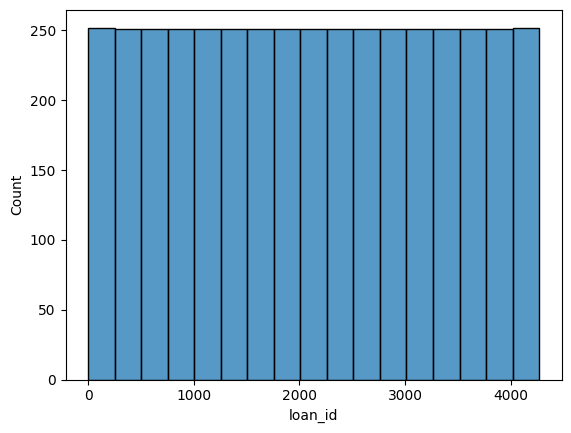

In [18]:
sns.histplot(data2['loan_id'])

<Axes: xlabel='no_of_dependents', ylabel='Count'>

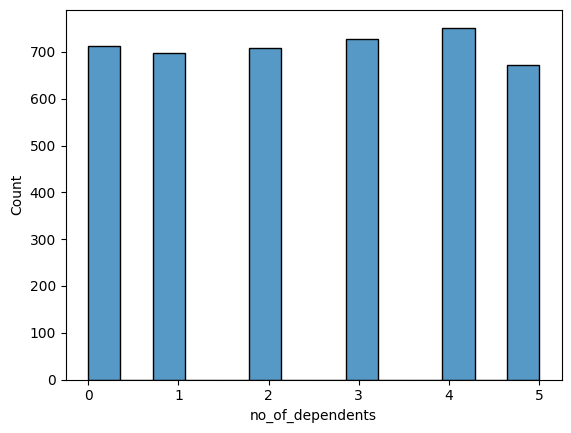

In [19]:
sns.histplot(data2['no_of_dependents'])

<Axes: xlabel='income_annum', ylabel='Count'>

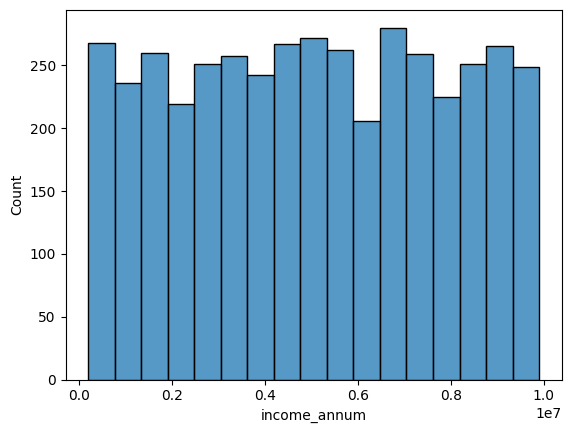

In [20]:
sns.histplot(data2['income_annum'])

<Axes: xlabel='loan_amount', ylabel='Count'>

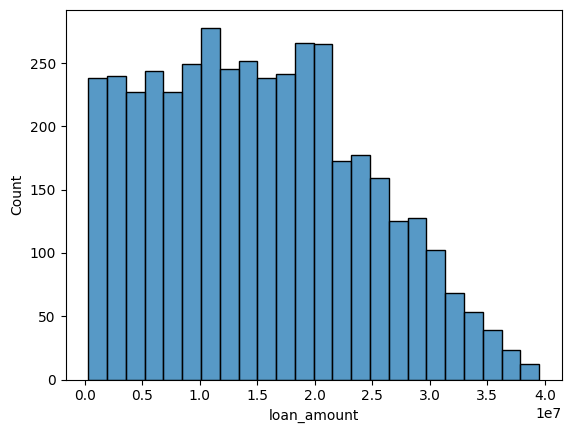

In [21]:
sns.histplot(data2['loan_amount'])

<Axes: xlabel='loan_term', ylabel='Count'>

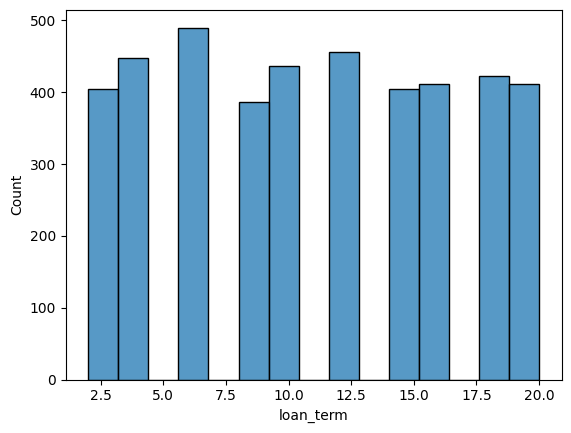

In [22]:
sns.histplot(data2['loan_term'])

<Axes: xlabel='cibil_score', ylabel='Count'>

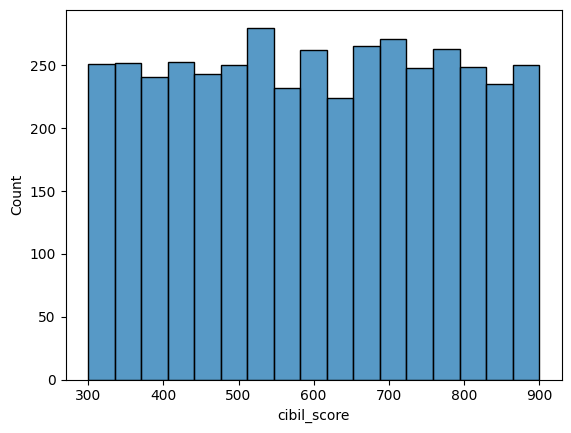

In [23]:
sns.histplot(data2['cibil_score'])

<Axes: xlabel='residential_assets_value', ylabel='Count'>

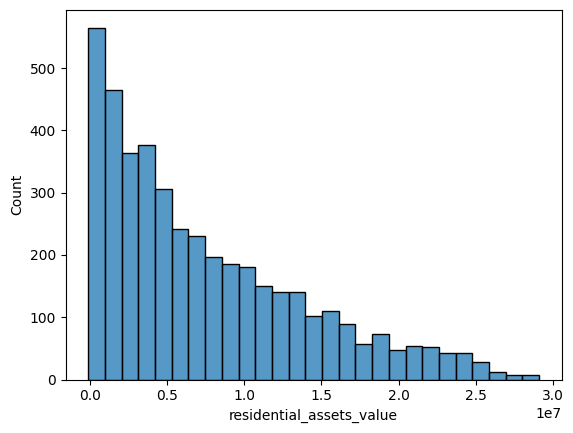

In [24]:
sns.histplot(data2['residential_assets_value'])

<Axes: xlabel='commercial_assets_value', ylabel='Count'>

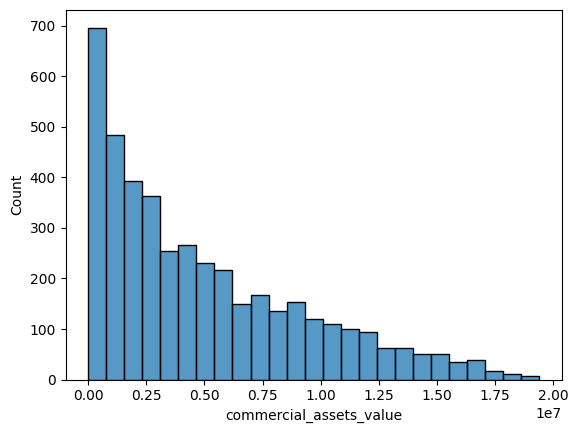

In [25]:
sns.histplot(data2['commercial_assets_value'])

<Axes: xlabel='luxury_assets_value', ylabel='Count'>

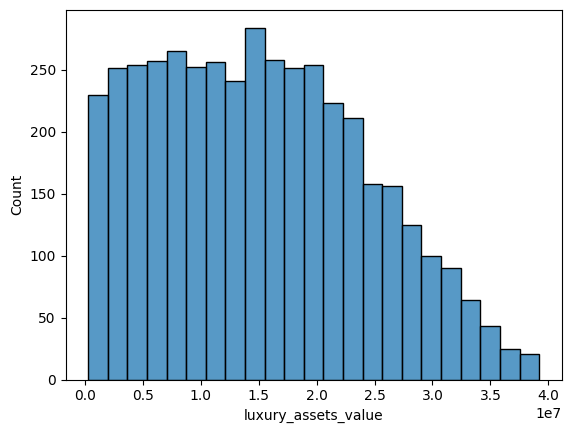

In [26]:
sns.histplot(data2['luxury_assets_value'])

<Axes: xlabel='bank_asset_value', ylabel='Count'>

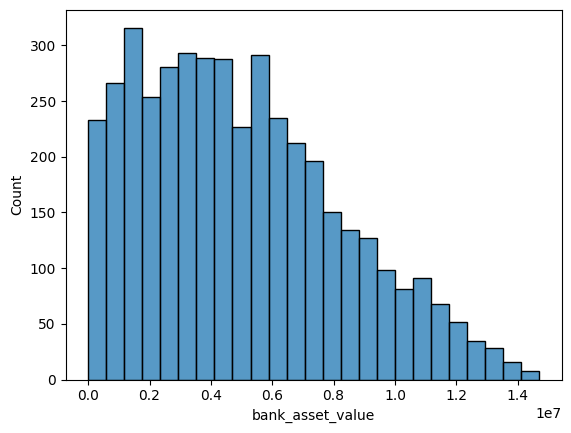

In [27]:
sns.histplot(data2['bank_asset_value'])

Next, I will check for for duplicates.

In [28]:
data2.duplicated().sum()

0

Next, I will evaluate the categorical data in the dataset. I will begin by checking the data types again.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Next, I will use the $value$ $counts$ function to analyze the categorical data.

In [30]:
data['education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

In [31]:
data['self_employed'].value_counts()

 Yes    2150
 No     2119
Name: self_employed, dtype: int64

In [32]:
data['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

Next, I will use the describe function to display all features and the statistical data assoicated with each.

In [33]:
data2.describe(include='all')

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


Next, I will evaluate a continuous variable using a vertical bar chart.

<Axes: >

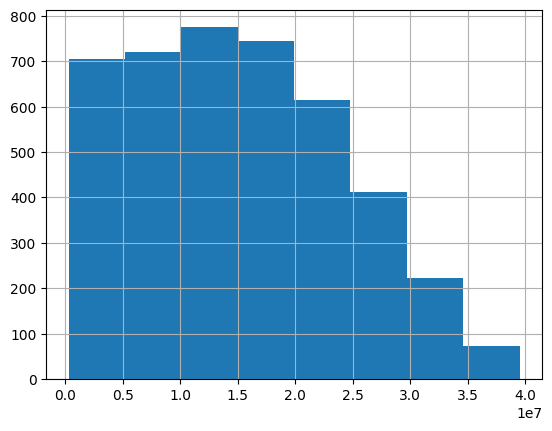

In [34]:
%matplotlib inline

data2['loan_amount'].hist(bins=8)

#Bivariate Analysis

Next, I will use $covariance$ and $coorelation$ to evaluate several different variables.

In [35]:
print('Covariance:')
data2.cov()

Covariance:


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.519052e+06,11.132146,4.356157e+07,9.106441e+07,69.019681,3.469049e+03,1.678147e+08,1.005890e+08,-9.675375e+06,4.312202e+07
no_of_dependents,1.113215e+01,2.876111,3.458884e+04,-5.162044e+04,-0.194716,-2.923817e+00,8.134944e+04,-1.139823e+04,4.348516e+04,6.153276e+04
income_annum,4.356157e+07,34588.842910,7.878350e+12,2.354222e+13,184097.390946,-1.114830e+07,1.162533e+13,7.888277e+12,2.374225e+13,7.764309e+12
loan_amount,9.106441e+07,-51620.436384,2.354222e+13,8.178241e+13,435617.723555,-2.656321e+07,3.497100e+13,2.394115e+13,7.087780e+13,2.316495e+13
loan_term,6.901968e+01,-0.194716,1.840974e+05,4.356177e+05,32.594819,7.688337e+00,2.976247e+05,-1.372561e+05,6.491753e+05,3.187428e+05
cibil_score,3.469049e+03,-2.923817,-1.114830e+07,-2.656321e+07,7.688337,2.973224e+04,-2.236879e+07,-2.852607e+06,-4.492292e+07,-8.674499e+06
residential_assets_value,1.678147e+08,81349.435557,1.162533e+13,3.497100e+13,297624.655243,-2.236879e+07,4.229729e+13,1.183975e+13,3.498763e+13,1.114856e+13
commercial_assets_value,1.005890e+08,-11398.230042,7.888277e+12,2.394115e+13,-137256.090694,-2.852607e+06,1.183975e+13,1.926302e+13,2.361913e+13,7.825405e+12
luxury_assets_value,-9.675375e+06,43485.164619,2.374225e+13,7.087780e+13,649175.262123,-4.492292e+07,3.498763e+13,2.361913e+13,8.287833e+13,2.333134e+13
bank_asset_value,4.312202e+07,61532.757354,7.764309e+12,2.316495e+13,318742.803275,-8.674499e+06,1.114856e+13,7.825405e+12,2.333134e+13,1.056370e+13


In [36]:
print('Correlation:')
data2.corr()

Correlation:


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


Next, I will check the data types again to use throughout the following lines of code.  

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


##Continuous vs. Continuous

Next, I will use scatter plots to compare features.



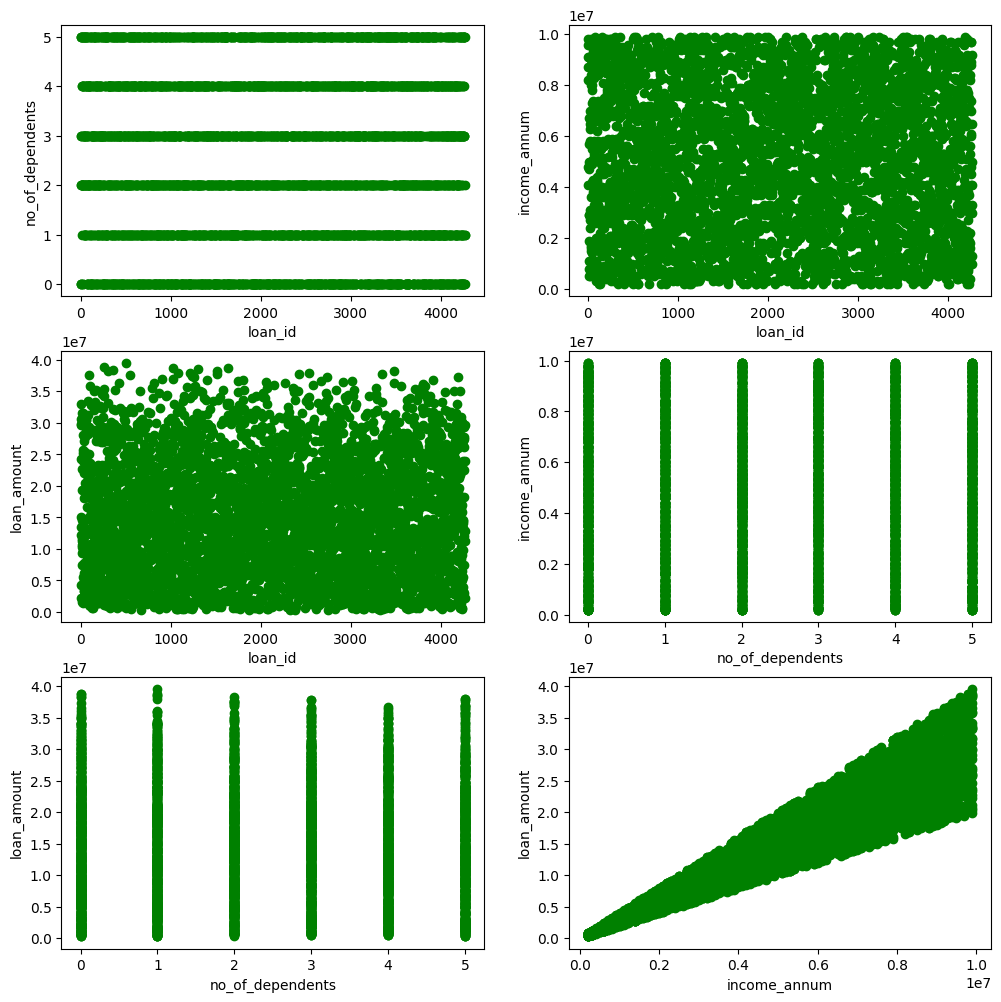

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data2[data2.columns[i]], data2[data2.columns[j]], color='green')
        axes[ax1][ax2].set_xlabel(data2.columns[i])
        axes[ax1][ax2].set_ylabel(data2.columns[j])
        index = index + 1

###Categorical vs Categorical

Next, I will compare two categorical variables.

<Axes: xlabel='loan_id', ylabel='Density'>

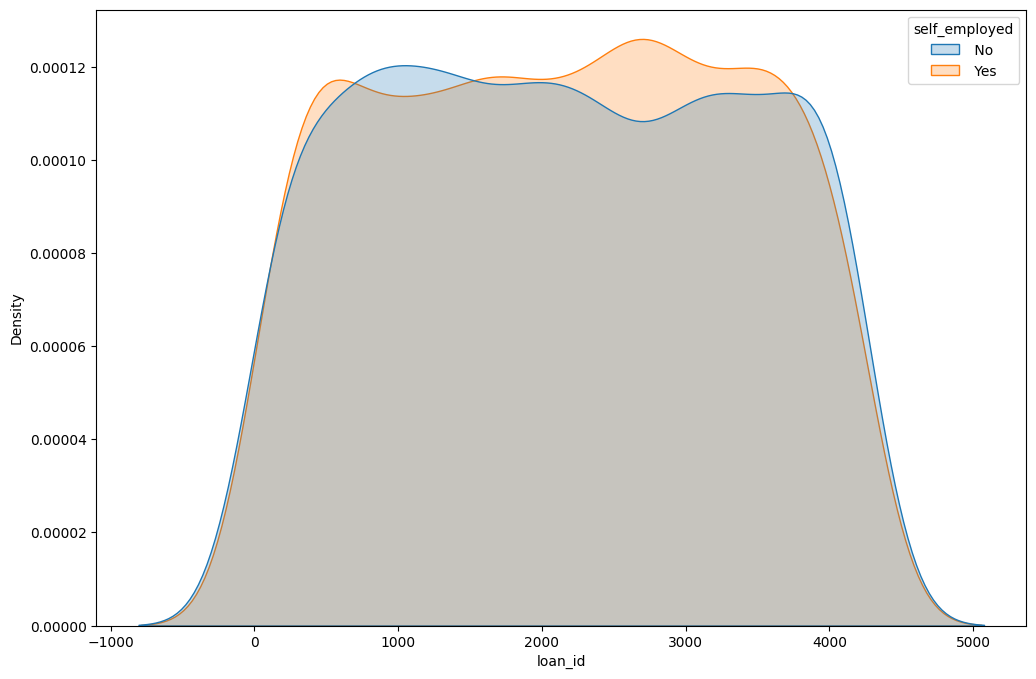

In [39]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=data, x='loan_id', hue='self_employed',fill=True)

Next, I will check for unequal distribution.

<Axes: >

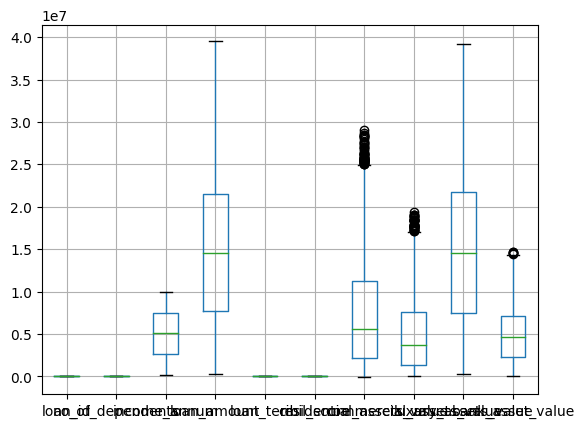

In [40]:
data2.boxplot()

#Multivariate Analysis:

Next, I will use a heat map to evaluate multiple variables.

<ipython-input-41-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

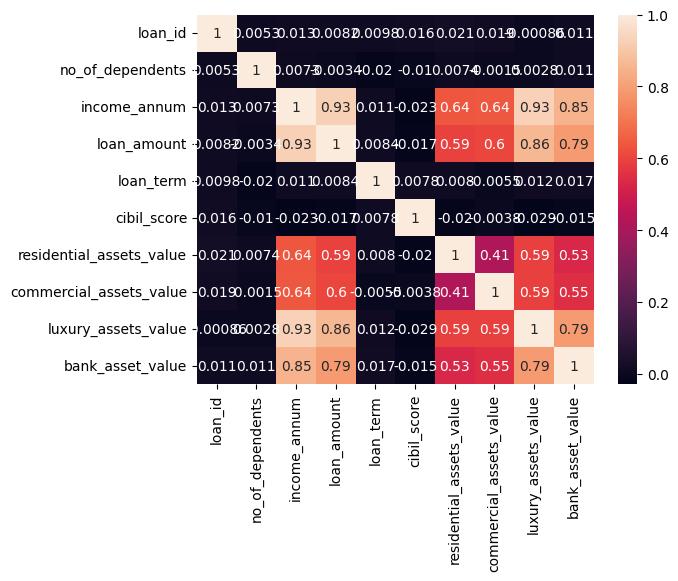

In [41]:
sns.heatmap(data.corr(), annot=True)

#Classification

Next, I need to import a few more packages to perform $classification$.

In [42]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

Next, I will display the first five rows of my dataset.

In [43]:
data2.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000


Next, I will check the data types.

In [44]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   income_annum              4269 non-null   int64
 3   loan_amount               4269 non-null   int64
 4   loan_term                 4269 non-null   int64
 5   cibil_score               4269 non-null   int64
 6   residential_assets_value  4269 non-null   int64
 7   commercial_assets_value   4269 non-null   int64
 8   luxury_assets_value       4269 non-null   int64
 9   bank_asset_value          4269 non-null   int64
dtypes: int64(10)
memory usage: 333.6 KB


Next, I will check for missing values.

In [45]:
data2.isnull().sum()

loan_id                     0
no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Next I will check my target variable, self employed, for the boolean variable.

In [47]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [48]:
data = data.drop(['education','loan_status'],axis=1)

Next, I will train my dataset.

In [49]:
y = data["self_employed"]
X = data.drop('self_employed',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

Next, I will scale the data.

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Next, I will use the logistic regression algorithm to check the accuracy of the dataset.

In [51]:
m1 = 'Logistic Regression'

lr = LogisticRegression()

model = lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)

lr_acc_score = accuracy_score(y_test, lr_predict)

print("Confussion Matrix")

print(lr_conf_matrix)

print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

print(classification_report(y_test,lr_predict))

Confussion Matrix
[[178 240]
 [207 229]]


Accuracy of Logistic Regression: 47.658079625292736 

              precision    recall  f1-score   support

          No       0.46      0.43      0.44       418
         Yes       0.49      0.53      0.51       436

    accuracy                           0.48       854
   macro avg       0.48      0.48      0.47       854
weighted avg       0.48      0.48      0.48       854



Next, I will check the predictiveness and capabilities using Naive Bayes.

In [52]:
m2 = 'Naive Bayes'

nb = GaussianNB()

nb.fit(X_train,y_train)

nbpred = nb.predict(X_test)

nb_conf_matrix = confusion_matrix(y_test, nbpred)

nb_acc_score = accuracy_score(y_test, nbpred)

print("Confussion Matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')

print(classification_report(y_test,nbpred))

Confussion Matrix
[[222 196]
 [241 195]]


Accuracy of Naive Bayes model: 48.82903981264637 

              precision    recall  f1-score   support

          No       0.48      0.53      0.50       418
         Yes       0.50      0.45      0.47       436

    accuracy                           0.49       854
   macro avg       0.49      0.49      0.49       854
weighted avg       0.49      0.49      0.49       854



#Findings:

Once the data had been fully preprocessed, the data could then be explored, giving me a better evaluation of the target variable I chose to explore. After exploring the data, I used the classification algorithms to analyze the dataset. Using the dataset I chose to execute the classification algorithm learned in this class, you can see the accuracy is relatively low, but possibly still useable. It would be important to keep this accuracy score in mind when using the predictive capabilities of the algorithm.

#References:

Chainika Thakar Blog: https://blog.quantinsti.com/data-preprocessing/

Dr. Reddy's Preprocessing Example: https://blackboard.ecok.edu/webapps/blackboard/execute/displayLearningUnit?course_id=_24357_1&content_id=_2338686_1&framesetWrapped=true

Dr. Reddy's Classification Example: https://blackboard.ecok.edu/ultra/courses/_24357_1/cl/outline

Jett's Machine Learning Repository: https://github.com/Jett987/Machine_Learning

Dataset: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset  